 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [171]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [172]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [173]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [174]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [175]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [176]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [212]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [219]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)
sp500_history.sort_index(inplace=True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [220]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [221]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].str.replace('$','').astype('float')
sp500_history.dtypes

Close    float64
dtype: object

In [223]:
# Calculate Daily Returns for SP500
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [224]:
# Drop nulls for SP500
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [225]:
# Rename Column to S&P 500
sp500_returns.columns = ['S&P 500']
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [226]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

<AxesSubplot:xlabel='Date'>

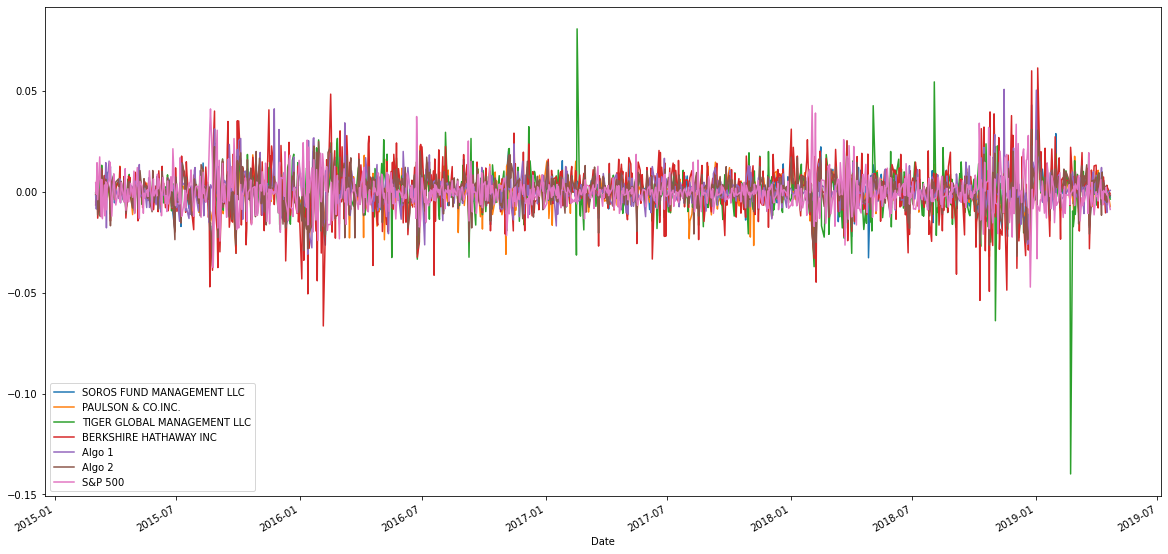

In [190]:
# Plot daily returns
combined_df.plot(figsize=(20,10))

In [312]:
"The performance of most of the portfolios have a strong correlation to the S&P 500 with the exception of Tiger Global Management LLC and Berkshire Hathaway Inc over the period.  Both Tiger Global Management LLC and Berkshire Hathaway Inc outperformed the S&P 500 during select periods; however, both Tiger Global Management LLC and Berkshire Hathaway Inc have greater volatility and may be considered riskier."

'The performance of most of the portfolios have a strong correlation to the S&P 500 with the exception of Tiger Global Management LLC and Berkshire Hathaway Inc over the period.  Both Tiger Global Management LLC and Berkshire Hathaway Inc outperformed the S&P 500 during select periods; however, both Tiger Global Management LLC and Berkshire Hathaway Inc have greater volatility and may be considered riskier.'

<AxesSubplot:xlabel='Date'>

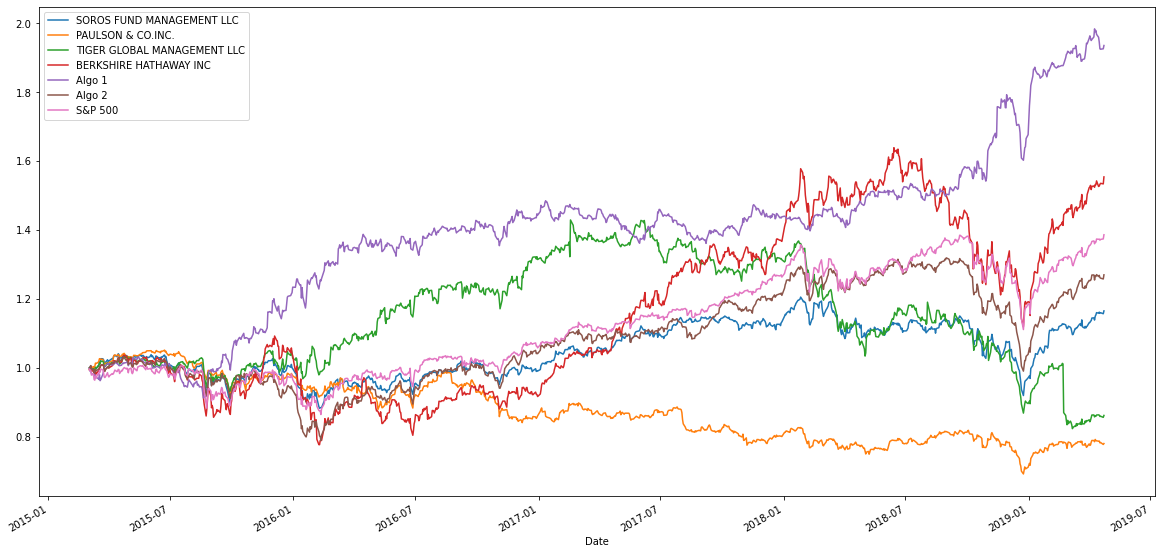

In [228]:
# Calculate cumulative returns
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

In [229]:
"Based on the cumulative returns plot, Algo 1, Tiger Global Management LLC consistently outperform S&P 500 and Berkshire Hathaway Inc outperforms during 2017 to 2018 before leveling off in 2019 following a more consistent pattern of the S&P 500."

'Based on the cumulative returns plot, Algo 1, Tiger Global Management LLC consistently outperform S&P 500 and Berkshire Hathaway Inc outperforms during 2017 to 2018 before leveling off in 2019 following a more consistent pattern of the S&P 500.'

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:>

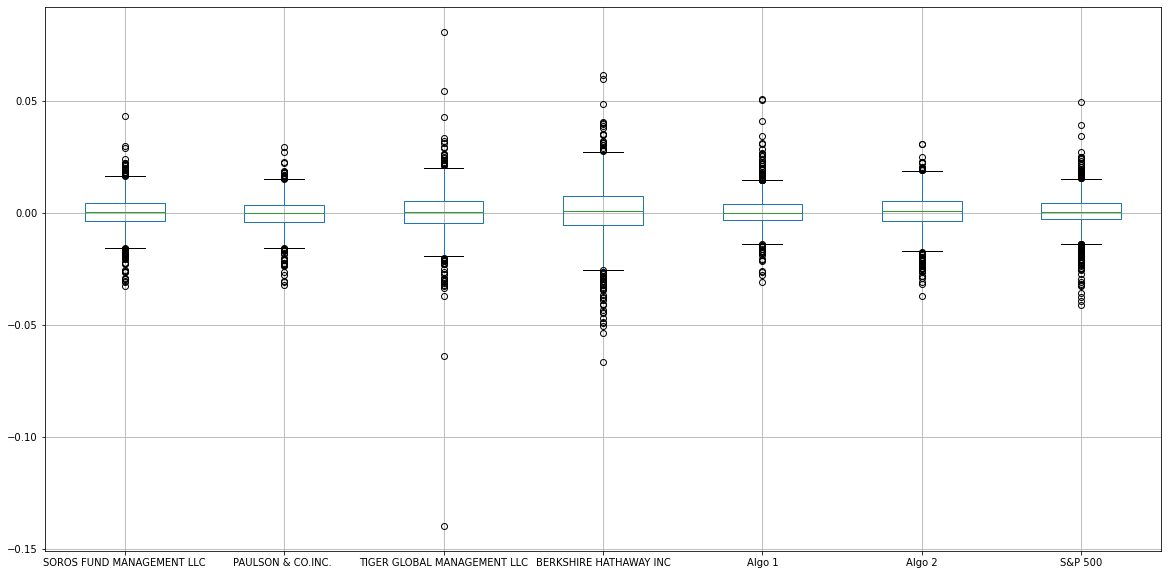

In [230]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(20,10))

In [231]:
"The box with the largest spread is Berkshire Hathaway Inc and the box with the smallest spread is Algo 2."

'The box with the largest spread is Berkshire Hathaway Inc and the box with the smallest spread is Algo 2.'

In [235]:
# Daily Standard Deviations
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [243]:
# Which portfolios are riskier than the S&P 500?
"The Tiger Global Management LLC and Berkshire Hathaway Inc portfolios are riskier than the S&P 500 because they have larger standard deviations than the S&P 500 and are thus riskier investments."

'The Tiger Global Management LLC and Berkshire Hathaway Inc portfolios are riskier than the S&P 500 because they have larger standard deviations than the S&P 500 and are thus riskier investments.'

In [256]:
# Determine which portfolios are riskier than the S&P 500
riskier_portfolio = combined_df.std()
riskier_portfolio > riskier_portfolio[6]

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [258]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_df.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:xlabel='Date'>

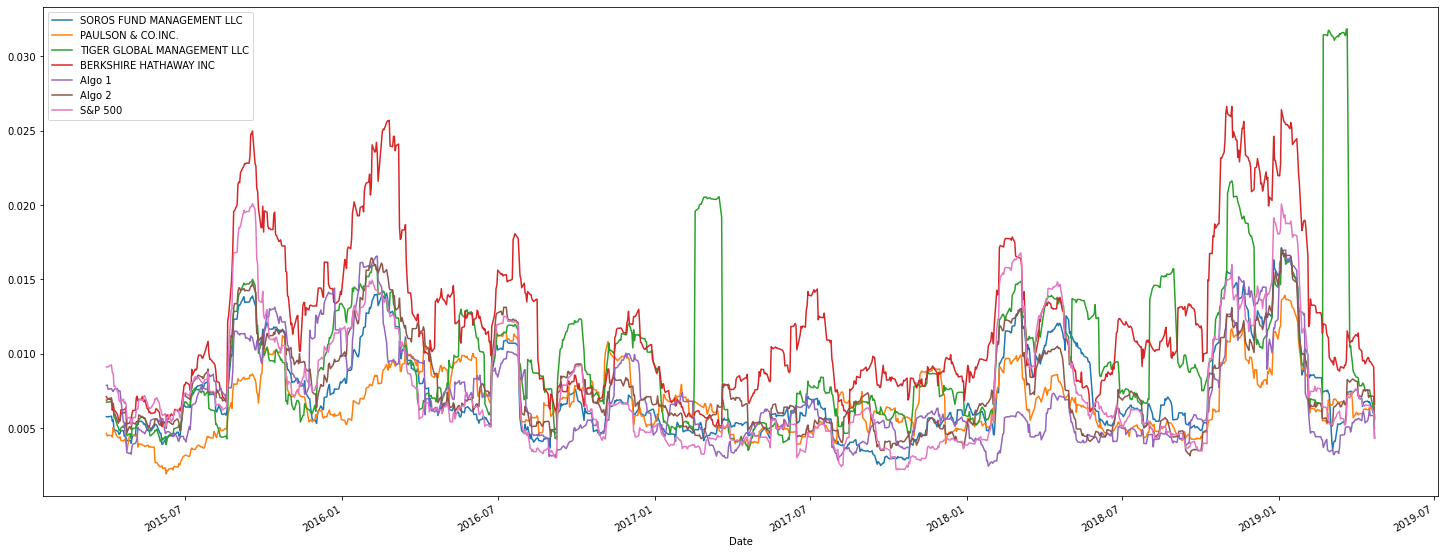

In [265]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_df.rolling(window=21).std().plot(figsize=(25,10))

In [267]:
"When the S&P 500 risk increases the overall risk for each of the other portfolios increases at the same time again noting that the risk for Tiger Global Management LLC and Berkshire Hathaway are more volatile and are showing greater risk increases than the S&P 500."

'When the S&P 500 risk increases the overall risk for each of the other portfolios increases at the same time again noting that the risk for Tiger Global Management LLC and Berkshire Hathaway are more volatile and are showing greater risk increases than the S&P 500.'

In [268]:
# Construct a correlation table
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [269]:
"The returns that are closely correlated with the S&P 500 are Soros Fund Management LLC and Algo 2 as the correlations for each portfolio is close to 1 under the S&P 500 column."

'The returns that are closely correlated with the S&P 500 are Soros Fund Management LLC and Algo 2 as the correlations for each portfolio is close to 1 under the S&P 500 column.'

In [303]:
# Calculate covariance of Berkshire Hathaway Inc Returns vs. S&P 500 Returns
berkshire_covariance = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['S&P 500'])
berkshire_covariance

8.302834941861689e-05

In [304]:
# Calculate variance of S&P 500
variance = combined_df['S&P 500'].var()
variance

7.316632424648712e-05

In [306]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
berkshire_beta = berkshire_covariance / variance
berkshire_beta

1.1347891297491723

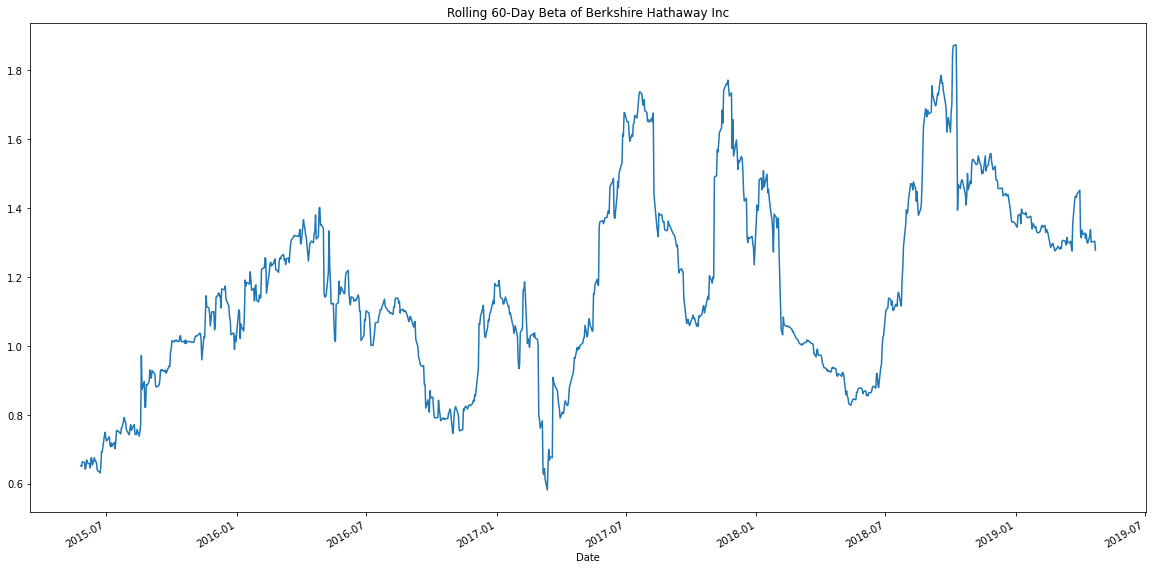

In [307]:
# Calculate 60-Day Rolling Betas of Berkshire Hathaway Inc and plot the data
rolling_berkshire_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['S&P 500'])
rolling_variance = combined_df['S&P 500'].rolling(window=60).var()
rolling_berkshire_beta = rolling_berkshire_covariance / rolling_variance
ax = rolling_berkshire_beta.plot(figsize=(20,10), title='Rolling 60-Day Beta of Berkshire Hathaway Inc')

In [310]:
"The selected portfolio Berkshire Hathaway Inc is sensitive to movements in the S&P 500 as shown by the fluctuations in the movements of the stock."

'The selected portfolio Berkshire Hathaway Inc is sensitive to movements in the S&P 500 as shown by the fluctuations in the movements of the stock.'

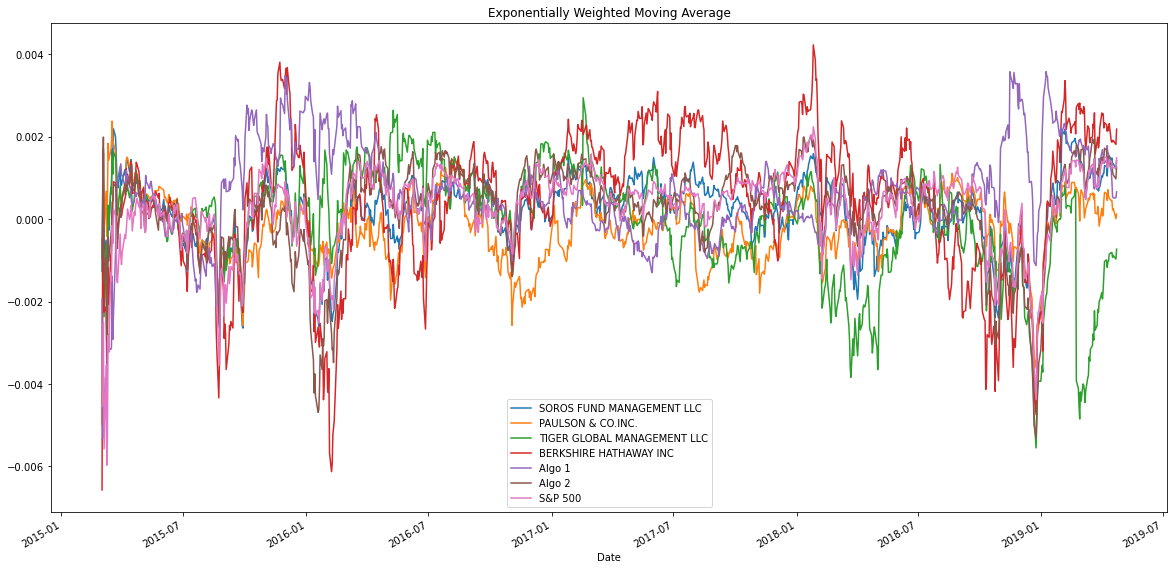

In [322]:
# Calculate a rolling window using the exponentially weighted moving average with 21-day half-life based on the mean
moving_average = combined_df.ewm(halflife=21).mean()
ax2 = moving_average.plot(figsize=(20,10), title='Exponentially Weighted Moving Average')

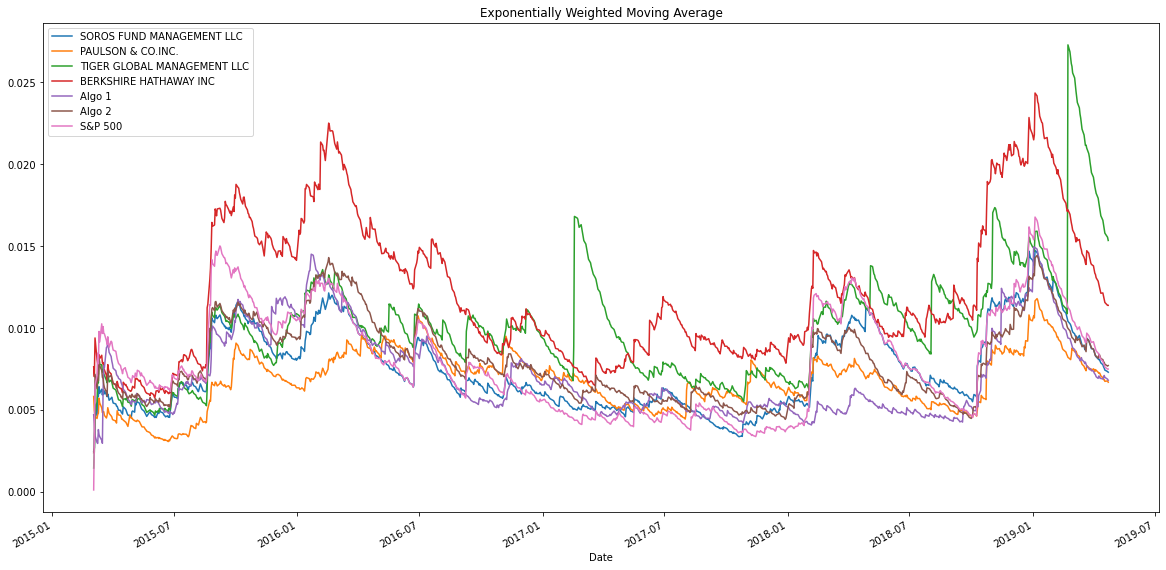

In [323]:
# Calculate a rolling window using the exponentially weighted moving average with 21-day half-life based on the standard deviation.
moving_average = combined_df.ewm(halflife=21).std()
ax2 = moving_average.plot(figsize=(20,10), title='Exponentially Weighted Moving Average')

In [324]:
"The exponentially weighted moving average is an alternative way to calculate a rolling window with the option to use .mean(), .var(), and .std().  Plotted using both the .mean() and the .std() to match homework example."

'The exponentially weighted moving average is an alternative way to calculate a rolling window with the option to use .mean(), .var(), and .std().  Plotted using both the .mean() and the .std() to match homework example.'

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [328]:
# Calculate annualized Sharpe Ratios 
# Avg of daily returns / Std of daily returns * sqrt 252 trading days per year
annualized_return = (combined_df.mean() / combined_df.std()) * np.sqrt(252)
annualized_return

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:>

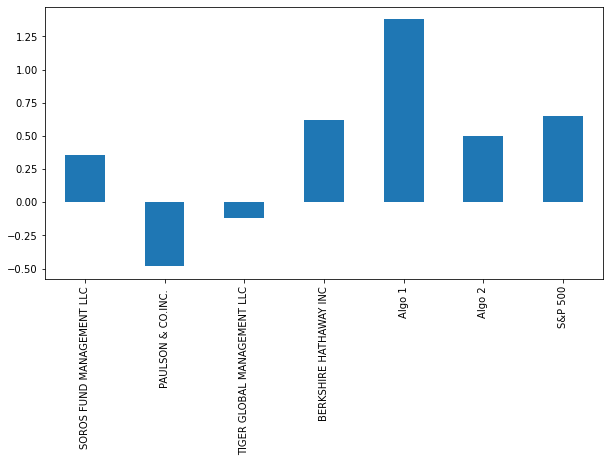

In [340]:
# Visualize the Sharpe Ratios as a bar plot
annualized_return.plot(kind='bar', figsize=(10,5))

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

In [341]:
"Based on the annualized Sharpe Ratios the Algo 1 portfolio outperforms the market and the whales portfolios.  Algo 2 performs well compared to the market, but does not outperform; however, it does outperform most of the whales portfolios with the exception of Berkshire Hathaway Inc."

'Based on the annualized Sharpe Ratios the Algo 1 portfolio outperforms the market and the whales portfolios.  Algo 2 performs well compared to the market, but does not outperform; however, it does outperform most of the whales portfolios with the exception of Berkshire Hathaway Inc.'

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [522]:
# Read the first stock - Amazon Closing Prices (AMZN)
amzn_csv = Path("Resources/amzn_google_finance.csv")
amzn_csv = pd.read_csv(amzn_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)
amzn_csv.sort_index(inplace=True)
amzn_csv.head()

,Symbol,Close
Date,,
2014-01-02,AMZN,397.97
2014-01-03,AMZN,396.44
2014-01-06,AMZN,393.63
2014-01-07,AMZN,398.03
2014-01-08,AMZN,401.92


In [523]:
# Read the second stock - Intuit Closing Prices (INTU)
intu_csv = Path("Resources/intu_google_finance.csv")
intu_csv = pd.read_csv(intu_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)
intu_csv.sort_index(inplace=True)
intu_csv.head()

,Symbol,Close
Date,,
2014-01-02,INTU,75.94
2014-01-03,INTU,75.80
2014-01-06,INTU,75.74
2014-01-07,INTU,77.06
2014-01-08,INTU,76.44


In [524]:
# Read the third stock - PayPal Closing Prices (PYPL)
pypl_csv = Path("Resources/pypl_google_finance.csv")
pypl_csv = pd.read_csv(pypl_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)
pypl_csv.sort_index(inplace=True)
pypl_csv.head()

,Symbol,Close
Date,,
2015-07-06,PYPL,36.71
2015-07-07,PYPL,36.62
2015-07-08,PYPL,34.70
2015-07-09,PYPL,34.50
2015-07-10,PYPL,34.69


In [527]:
# Concatenate all custom stocks into a single DataFrame
custom_df = pd.concat([amzn_csv, intu_csv, pypl_csv], axis="rows", join="inner")
custom_df.head()

,Symbol,Close
Date,,
2014-01-02,AMZN,397.97
2014-01-03,AMZN,396.44
2014-01-06,AMZN,393.63
2014-01-07,AMZN,398.03
2014-01-08,AMZN,401.92


In [528]:
# Reset the index
custom_df.reset_index(inplace=True)
custom_df.head()

,Date,Symbol,Close
0,2014-01-02,AMZN,397.97
1,2014-01-03,AMZN,396.44
2,2014-01-06,AMZN,393.63
3,2014-01-07,AMZN,398.03
4,2014-01-08,AMZN,401.92


In [529]:
# Pivot so that each column of prices represents a unique symbol
custom_df = custom_df.pivot(index='Date', columns='Symbol', values='Close')
custom_df.head()

Symbol,AMZN,INTU,PYPL
Date,,,
2014-01-02,397.97,75.94,NaN
2014-01-03,396.44,75.80,NaN
2014-01-06,393.63,75.74,NaN
2014-01-07,398.03,77.06,NaN
2014-01-08,401.92,76.44,NaN


In [530]:
# Calculate daily returns for each stock
custom_df = custom_df.pct_change()
custom_df.head()

Symbol,AMZN,INTU,PYPL
Date,,,
2014-01-02,NaN,NaN,NaN
2014-01-03,-0.003845,-0.001844,NaN
2014-01-06,-0.007088,-0.000792,NaN
2014-01-07,0.011178,0.017428,NaN
2014-01-08,0.009773,-0.008046,NaN


In [531]:
# Count nulls
custom_df.isnull().sum()

Symbol
AMZN      1
INTU      1
PYPL    379
dtype: int64

In [532]:
# Drop Nulls
custom_df.dropna(inplace=True)
custom_df.head()

Symbol,AMZN,INTU,PYPL
Date,,,
2015-07-07,0.001559,0.016287,-0.002452
2015-07-08,-0.016074,-0.001448,-0.052430
2015-07-09,0.010915,0.001450,-0.005764
2015-07-10,0.020995,0.007530,0.005507
2015-07-13,0.027192,0.010253,0.060248


In [533]:
# Count nulls
custom_df.isnull().sum()

Symbol
AMZN    0
INTU    0
PYPL    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [534]:
# Calculate weighted portfolio returns assuming equal number of shares
weights = [1/3, 1/3, 1/3]
portfolio_returns = custom_df.dot(weights)
portfolio_returns.head()

Date
2015-07-07    0.005132
2015-07-08   -0.023318
2015-07-09    0.002200
2015-07-10    0.011344
2015-07-13    0.032564
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [535]:
# Custom portfolio is added to the larger dataframe of fund returns
joined_portfolio = pd.concat(([portfolio_returns, combined_df]), axis="columns", join="inner")
joined_portfolio.rename(columns={0: "Custom"}, inplace=True)
joined_portfolio = joined_portfolio[['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'S&P 500', 'Custom']]
joined_portfolio.sort_index()
joined_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2015-07-07,0.000597,0.003962,0.004652,-0.007634,-0.004611,-0.002519,0.006081,0.005132
2015-07-08,-0.017211,-0.007654,-0.014788,-0.011737,-0.013853,-0.015528,-0.016653,-0.023318
2015-07-09,0.007472,0.003887,0.000441,0.017670,0.014090,0.003624,0.002262,0.002200
2015-07-10,0.008969,0.003589,0.013605,0.007015,0.003362,0.014381,0.012338,0.011344
2015-07-13,0.007946,0.001149,0.008658,0.010178,0.004215,0.008575,0.011066,0.032564


In [539]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# Count nulls
joined_portfolio.isnull().sum()
# Drop Nulls
joined_portfolio.dropna(inplace=True)
joined_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2015-07-07,0.000597,0.003962,0.004652,-0.007634,-0.004611,-0.002519,0.006081,0.005132
2015-07-08,-0.017211,-0.007654,-0.014788,-0.011737,-0.013853,-0.015528,-0.016653,-0.023318
2015-07-09,0.007472,0.003887,0.000441,0.017670,0.014090,0.003624,0.002262,0.002200
2015-07-10,0.008969,0.003589,0.013605,0.007015,0.003362,0.014381,0.012338,0.011344
2015-07-13,0.007946,0.001149,0.008658,0.010178,0.004215,0.008575,0.011066,0.032564


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [540]:
# Daily Standard Deviations
joined_portfolio.std()

SOROS FUND MANAGEMENT LLC      0.008092
PAULSON & CO.INC.              0.007248
TIGER GLOBAL MANAGEMENT LLC    0.011254
BERKSHIRE HATHAWAY INC         0.013342
Algo 1                         0.007772
Algo 2                         0.008520
S&P 500                        0.008680
Custom                         0.014358
dtype: float64

In [541]:
# Calculate the annualized standard deviation (252 trading days)
joined_annualized_std = joined_portfolio.std() * np.sqrt(252)
joined_annualized_std

SOROS FUND MANAGEMENT LLC      0.128451
PAULSON & CO.INC.              0.115060
TIGER GLOBAL MANAGEMENT LLC    0.178657
BERKSHIRE HATHAWAY INC         0.211795
Algo 1                         0.123379
Algo 2                         0.135252
S&P 500                        0.137790
Custom                         0.227929
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

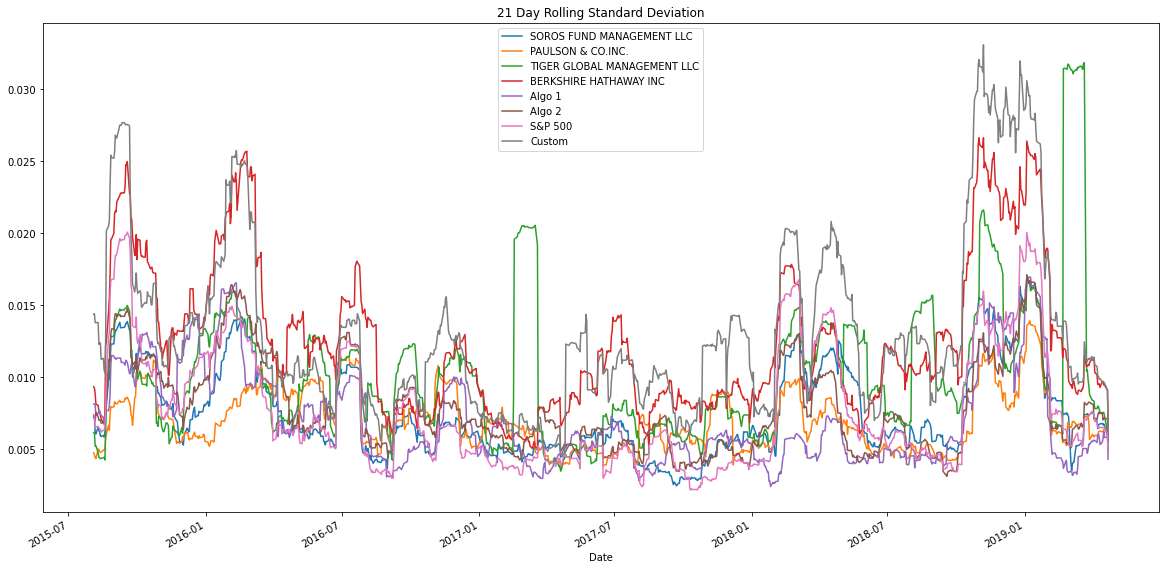

In [549]:
# Calculate and plot the rolling standard deviation for all portfolios using a 21 trading day window
joined_portfolio.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

In [550]:
# Calculate annualized Sharpe Ratios
# Avg of joined portfolio returns / Std of joined portfolio returns * sqrt 252 trading days per year
annualized_return2 = (joined_portfolio.mean() / joined_portfolio.std()) * np.sqrt(252)
annualized_return2

SOROS FUND MANAGEMENT LLC      0.374540
PAULSON & CO.INC.             -0.594726
TIGER GLOBAL MANAGEMENT LLC   -0.126606
BERKSHIRE HATHAWAY INC         0.682010
Algo 1                         1.499441
Algo 2                         0.547964
S&P 500                        0.737344
Custom                         1.522100
dtype: float64

<AxesSubplot:>

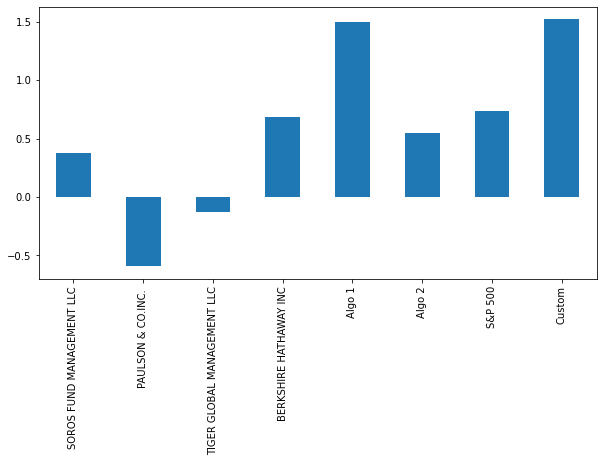

In [551]:
# Visualize the sharpe ratios as a bar plot
annualized_return2.plot(kind='bar', figsize=(10,5))

In [552]:
# Create a correlation analysis
correlation2 = joined_portfolio.corr()
correlation2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.699874,0.554362,0.753733,0.326845,0.827389,0.839239,0.669978
PAULSON & CO.INC.,0.699874,1.000000,0.428079,0.543406,0.277709,0.679331,0.672557,0.493709
TIGER GLOBAL MANAGEMENT LLC,0.554362,0.428079,1.000000,0.416998,0.166438,0.497358,0.615782,0.427173
BERKSHIRE HATHAWAY INC,0.753733,0.543406,0.416998,1.000000,0.297634,0.686031,0.754917,0.728918
Algo 1,0.326845,0.277709,0.166438,0.297634,1.000000,0.299336,0.286461,0.243496
Algo 2,0.827389,0.679331,0.497358,0.686031,0.299336,1.000000,0.858622,0.637593
S&P 500,0.839239,0.672557,0.615782,0.754917,0.286461,0.858622,1.000000,0.778745
Custom,0.669978,0.493709,0.427173,0.728918,0.243496,0.637593,0.778745,1.000000


In [556]:
# Calculate covariance of Custom Returns vs. S&P 500 Returns
custom_covariance = joined_portfolio['Custom'].cov(joined_portfolio['S&P 500'])
custom_covariance

9.705419102566452e-05

In [557]:
# Calculate variance of S&P 500
variance2 = joined_portfolio['S&P 500'].var()
variance2

7.534210031775098e-05

In [558]:
# Beta of Custom Portfolio
custom_beta = custom_covariance / variance2
custom_beta

1.2881800562546577

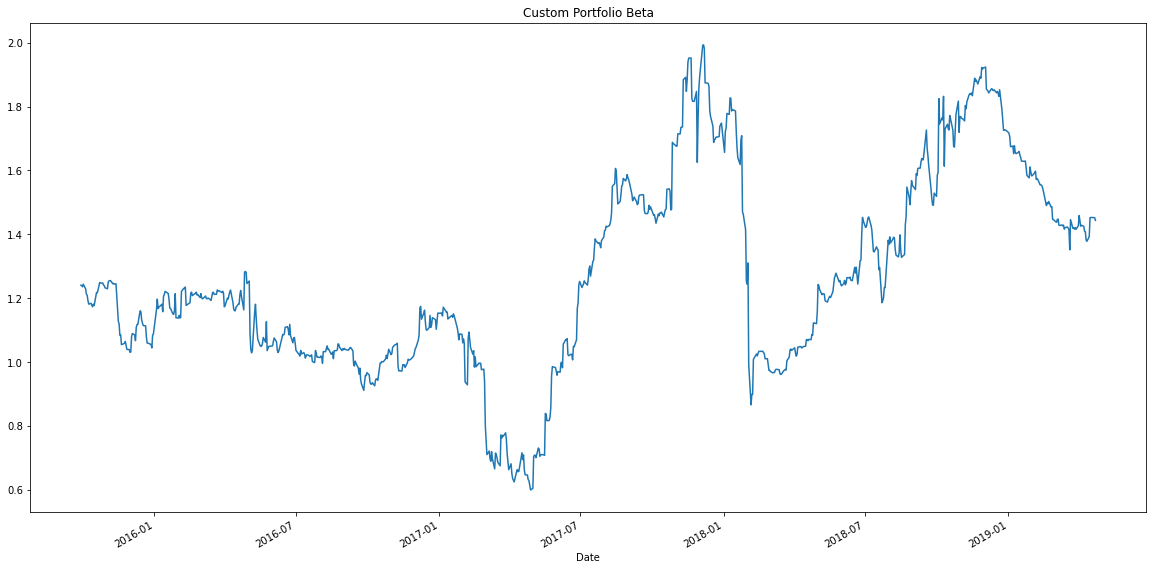

In [560]:
# Plot of Custom Portfolio Beta
rolling_custom_covariance = joined_portfolio['Custom'].rolling(window=60).cov(joined_portfolio['S&P 500'])
rolling_variance2 = joined_portfolio['S&P 500'].rolling(window=60).var()
rolling_custom_beta = rolling_custom_covariance / rolling_variance2
ax2 = rolling_custom_beta.plot(figsize=(20,10), title='Custom Portfolio Beta')